In [1]:
import pandas as pd

train = pd.read_csv('train.csv.zip')

In [99]:
import pandas as pd

test = pd.read_csv('test.csv.zip')

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score
from lightgbm import LGBMClassifier

model = LGBMClassifier(max_depth=2, learning_rate=0.01, n_estimators=1000)

#p = cross_val_predict(model, train[[f]].values, train['target'], method='predict_proba')[:, 1]
#'%.4f' % roc_auc_score(train['target'], p)

In [3]:
import numpy as np

counters = np.load('value_counters.npy')

In [7]:
import pandas as pd

for i in range(200):
    counters[i] = pd.Series(counters[i]) == 1

In [14]:
%%time

for i in range(200):
    f = 'var_%d' % i
    f_vc = '%s_vc' % f

    train[f_vc] = counters[i][train[f]].values

CPU times: user 1.24 s, sys: 0 ns, total: 1.24 s
Wall time: 1.24 s


In [100]:
%%time

for i in range(200):
    f = 'var_%d' % i
    f_vc = '%s_vc' % f

    test[f_vc] = counters[i][test[f]].values

CPU times: user 1.28 s, sys: 0 ns, total: 1.28 s
Wall time: 1.28 s


In [4]:
p = cross_val_predict(model, train[[f, '%s_vc' % f]].values, train['target'], method='predict_proba')[:, 1]
'%.4f' % roc_auc_score(train['target'], p)

'0.5217'

In [15]:
from sklearn.cross_validation import train_test_split

#for i in range(200):
#    f = 'var_%d' % i
#    train[f] = train[f].rank()
    
a, b = train_test_split(train, test_size = 0.2, random_state=0)

In [16]:
features = range(200)
results = [[] for i in features]

In [114]:
import numpy as np
import tqdm
from sklearn.metrics import log_loss
import random

for iteration in range(100):
    parameters = {
        'max_depth': random.choice([1, 2]), 
        'learning_rate': random.choice(np.linspace(0.02, 0.1, 17)), 
        'n_estimators': random.choice(range(10, 410, 10)),
        'subsample': random.choice(np.linspace(0.2, 1.0, 9)),
        'subsample_freq': random.choice(range(1, 5)),
        'num_leaves': random.choice(range(7, 17, 2)),
        'random_state': 0,
    }
    print parameters
    model = LGBMClassifier(**parameters)

    for i in features:
        f = 'var_%d' % i
        f_vc = '%s_vc' % f
        model.fit(a[[f, f_vc]].values, a['target'])

        p = model.predict_proba(b[[f, f_vc]].values)[:, 1]
        score = roc_auc_score(b['target'], p)
        score2 = log_loss(b['target'], p)

        if score > max(results[i])[0] or score2 < min_log_loss(results[i])[1]:
            results[i].append((score, score2, parameters, p))
            print '%d:\tLL %d\tAUC %d' % (i, 100000 * (0.33 - score2), 10000 * abs(score - 0.5))
            
    p = select_p(results, min_log_loss_n)
    p = aggregate(p)
    t = b['target'].values
    
    print
    print '%.5f' % roc_auc_score(t, p)
    print

{'num_leaves': 9, 'subsample_freq': 2, 'learning_rate': 0.03, 'n_estimators': 110, 'subsample': 0.5, 'random_state': 0, 'max_depth': 2}
3:	LL 424	AUC 52
8:	LL 446	AUC 196
9:	LL 587	AUC 452
12:	LL 803	AUC 637
44:	LL 648	AUC 393
49:	LL 518	AUC 266
86:	LL 604	AUC 367
97:	LL 459	AUC 168
99:	LL 660	AUC 499
110:	LL 713	AUC 513
118:	LL 548	AUC 456
120:	LL 423	AUC 109
123:	LL 598	AUC 446
135:	LL 520	AUC 273
145:	LL 493	AUC 234
170:	LL 593	AUC 350
192:	LL 505	AUC 401
0.52618, 0.32485

0.92270

{'num_leaves': 9, 'subsample_freq': 4, 'learning_rate': 0.045, 'n_estimators': 10, 'subsample': 0.5, 'random_state': 0, 'max_depth': 1}
14:	LL 415	AUC 18
25:	LL 417	AUC 21
63:	LL 418	AUC 133
65:	LL 418	AUC 104
93:	LL 462	AUC 351
96:	LL 413	AUC 20
140:	LL 420	AUC 139
143:	LL 418	AUC 65
152:	LL 418	AUC 76
0.52617, 0.32485

0.92277

{'num_leaves': 15, 'subsample_freq': 2, 'learning_rate': 0.06, 'n_estimators': 400, 'subsample': 0.5, 'random_state': 0, 'max_depth': 1}
53:	LL 692	AUC 525
129:	LL 418	AUC 96
0.5

35:	LL 471	AUC 312
44:	LL 629	AUC 429
45:	LL 459	AUC 268
48:	LL 488	AUC 380
54:	LL 428	AUC 133
56:	LL 512	AUC 260
59:	LL 423	AUC 41
141:	LL 538	AUC 347
152:	LL 428	AUC 55
161:	LL 415	AUC 67
194:	LL 435	AUC 125
0.52642, 0.32484

0.92357

{'num_leaves': 15, 'subsample_freq': 3, 'learning_rate': 0.095, 'n_estimators': 180, 'subsample': 0.9000000000000001, 'random_state': 0, 'max_depth': 2}
0.52642, 0.32484

0.92357

{'num_leaves': 15, 'subsample_freq': 2, 'learning_rate': 0.035, 'n_estimators': 350, 'subsample': 0.30000000000000004, 'random_state': 0, 'max_depth': 1}
129:	LL 417	AUC 105
0.52642, 0.32484

0.92357

{'num_leaves': 9, 'subsample_freq': 3, 'learning_rate': 0.05, 'n_estimators': 60, 'subsample': 1.0, 'random_state': 0, 'max_depth': 2}
6:	LL 712	AUC 620
53:	LL 698	AUC 517
55:	LL 462	AUC 138
61:	LL 431	AUC 69
63:	LL 435	AUC 103
66:	LL 451	AUC 225
82:	LL 522	AUC 287
106:	LL 482	AUC 295
108:	LL 594	AUC 425
110:	LL 714	AUC 515
114:	LL 467	AUC 207
121:	LL 527	AUC 326
123:	LL 589	AUC 

15:	LL 448	AUC 197
69:	LL 432	AUC 120
72:	LL 434	AUC 210
91:	LL 508	AUC 361
98:	LL 421	AUC 113
0.52661, 0.32484

0.92395

{'num_leaves': 13, 'subsample_freq': 2, 'learning_rate': 0.03, 'n_estimators': 250, 'subsample': 0.4, 'random_state': 0, 'max_depth': 1}
0.52661, 0.32484

0.92395

{'num_leaves': 15, 'subsample_freq': 4, 'learning_rate': 0.02, 'n_estimators': 280, 'subsample': 0.4, 'random_state': 0, 'max_depth': 1}
15:	LL 448	AUC 199
34:	LL 583	AUC 477
54:	LL 429	AUC 135
85:	LL 465	AUC 215
0.52661, 0.32484

0.92393

{'num_leaves': 11, 'subsample_freq': 2, 'learning_rate': 0.06, 'n_estimators': 110, 'subsample': 0.30000000000000004, 'random_state': 0, 'max_depth': 1}
12:	LL 802	AUC 643
30:	LL 416	AUC 75
32:	LL 446	AUC 201
41:	LL 419	AUC 80
98:	LL 423	AUC 90
111:	LL 485	AUC 284
189:	LL 427	AUC 178
190:	LL 619	AUC 524
0.52662, 0.32484

0.92395

{'num_leaves': 11, 'subsample_freq': 2, 'learning_rate': 0.1, 'n_estimators': 300, 'subsample': 0.8, 'random_state': 0, 'max_depth': 2}
0.5266

68:	LL 422	AUC 80
126:	LL 417	AUC 102
128:	LL 482	AUC 332
157:	LL 505	AUC 346
0.52679, 0.32484

0.92446

{'num_leaves': 13, 'subsample_freq': 2, 'learning_rate': 0.085, 'n_estimators': 360, 'subsample': 0.9000000000000001, 'random_state': 0, 'max_depth': 1}
38:	LL 420	AUC 118
0.52678, 0.32484

0.92446



In [105]:
def predict_test(results, opt_f):
    predictions = []
    for i in tqdm.tqdm_notebook(range(200)):
        f = 'var_%d' % i
        f_vc = '%s_vc' % f
        
        _, _, parameters, _ = opt_f(results[i])
        fixed_parameters = dict(parameters)
        fixed_parameters['n_estimators'] = int(1.1 * fixed_parameters['n_estimators'])
        
        model = LGBMClassifier(**fixed_parameters)
        
        model.fit(train[[f, f_vc]].values, train['target'])
        p = model.predict_proba(test[[f, f_vc]].values)[:, 1]
        
        predictions.append(p)
        
    predictions = np.column_stack(predictions)    
    return predictions

p_test = predict_test(results, min_log_loss)
p_test = aggregate(p_test)
p_test

array([2.77672978, 2.97180211, 7.40064691, ..., 0.09006194, 1.63697561,
       1.73380037])

In [209]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold

cv = StratifiedKFold(shuffle=True, n_splits=3, random_state=1)
def check_score(results):
    predictions = []
    for i in tqdm.tqdm_notebook(range(200)):
        f = 'var_%d' % i
        f_vc = '%s_vc' % f
        runs = sorted(results[i], key=lambda x: x[1])
        
        p_folds = []
        for j in range(5): 
            _, _, parameters, _ = runs[j]
            fixed_parameters = dict(parameters)
            fixed_parameters['n_estimators'] = fixed_parameters['n_estimators']

            model = LGBMClassifier(**fixed_parameters)

            p = cross_val_predict(model, train[[f, f_vc]].values, train['target'], cv=cv, method='predict_proba')[:, 1]
            #print '%d, %d, %.5f' % (i, j, log_loss(train['target'], p))
            p_folds.append(p)
            
        p = np.mean(np.column_stack(p_folds), axis=1)
        print '%d, %.5f' % (i, log_loss(train['target'], p))
        predictions.append(p)
        print '%d, %.5f' % (i, roc_auc_score(train['target'], aggregate(np.column_stack(predictions))))
        print
        
    predictions = np.column_stack(predictions)    
    return predictions

p_train = check_score(results)
print '%.4f' % (roc_auc_score(train['target'], aggregate(p_train)))


0, 0.32393
0, 0.54606

1, 0.32402
1, 0.57220

2, 0.32361
2, 0.59451

3, 0.32605
3, 0.59568

4, 0.32607
4, 0.59655

5, 0.32457
5, 0.60566

6, 0.32327
6, 0.62637

7, 0.32617
7, 0.62626

8, 0.32584
8, 0.62827

9, 0.32449
9, 0.63854

10, 0.32614
10, 0.63872

11, 0.32571
11, 0.64107

12, 0.32265
12, 0.65807

13, 0.32360
13, 0.66901

14, 0.32614
14, 0.66915

15, 0.32596
15, 0.67008

16, 0.32619
16, 0.66977

17, 0.32617
17, 0.66976

18, 0.32432
18, 0.67716

19, 0.32598
19, 0.67770

20, 0.32588
20, 0.67912

21, 0.32346
21, 0.68923

22, 0.32330
22, 0.69875

23, 0.32577
23, 0.70012

24, 0.32554
24, 0.70204

25, 0.32607
25, 0.70226

26, 0.32251
26, 0.71320

27, 0.32617
27, 0.71314

28, 0.32579
28, 0.71436

29, 0.32617
29, 0.71433

30, 0.32620
30, 0.71416

31, 0.32581
31, 0.71524

32, 0.32532
32, 0.71808

33, 0.32406
33, 0.72377

34, 0.32436
34, 0.72911

35, 0.32522
35, 0.73198

36, 0.32512
36, 0.73489

37, 0.32608
37, 0.73511

38, 0.32619
38, 0.73494

39, 0.32614
39, 0.73495

40, 0.32371
40, 0.74

In [210]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold

cv = StratifiedKFold(shuffle=True, n_splits=10, random_state=1)

p_train = check_score(results)
print '%.4f' % (roc_auc_score(train['target'], aggregate(p_train)))

0, 0.32388
0, 0.54657

1, 0.32396
1, 0.57296

2, 0.32357
2, 0.59543

3, 0.32605
3, 0.59653

4, 0.32606
4, 0.59739

5, 0.32457
5, 0.60640

6, 0.32325
6, 0.62706

7, 0.32618
7, 0.62690

8, 0.32583
8, 0.62900

9, 0.32449
9, 0.63931

10, 0.32614
10, 0.63948

11, 0.32570
11, 0.64195

12, 0.32265
12, 0.65894

13, 0.32353
13, 0.66985

14, 0.32614
14, 0.66998

15, 0.32596
15, 0.67091

16, 0.32617
16, 0.67062

17, 0.32617
17, 0.67059

18, 0.32427
18, 0.67812

19, 0.32589
19, 0.67916

20, 0.32577
20, 0.68092

21, 0.32339
21, 0.69133

22, 0.32330
22, 0.70079

23, 0.32577
23, 0.70219

24, 0.32550
24, 0.70430

25, 0.32607
25, 0.70452

26, 0.32250
26, 0.71523

27, 0.32618
27, 0.71516

28, 0.32579
28, 0.71632

29, 0.32617
29, 0.71631

30, 0.32619
30, 0.71617

31, 0.32579
31, 0.71729

32, 0.32531
32, 0.72014

33, 0.32405
33, 0.72582

34, 0.32435
34, 0.73106

35, 0.32523
35, 0.73389

36, 0.32508
36, 0.73695

37, 0.32608
37, 0.73719

38, 0.32619
38, 0.73702

39, 0.32614
39, 0.73705

40, 0.32366
40, 0.74

In [216]:
n_folds = 10
from sklearn.model_selection import KFold, StratifiedKFold

cv = StratifiedKFold(shuffle=True, n_splits=n_folds, random_state=1)

top_count = 5
def cross_val_predict_with_test(results):
    predictions = []
    predictions_train = np.zeros((train.shape[0], 200, top_count))
    predictions_test = np.zeros((test.shape[0], 200, top_count))
    for i in tqdm.tqdm_notebook(range(200)):
        f = 'var_%d' % i
        f_vc = '%s_vc' % f
        runs = sorted(results[i], key=lambda x: x[1])
        X_i = train[[f, f_vc]].values
        y_i = train['target'].values
        X_test_i = test[[f, f_vc]].values
        
        p_folds = []
        for j in range(top_count): 
            s, s2, parameters, _ = runs[j]
            fixed_parameters = dict(parameters)
            
            model = LGBMClassifier(**fixed_parameters)
            for k, (train_i, val_i) in enumerate(cv.split(X_i, y_i)):
                model.fit(X_i[train_i], y_i[train_i])
                p_train_k = model.predict_proba(X_i[val_i])[:, 1]
                predictions_train[val_i, i, j] = p_train_k
                
                p_test_k = model.predict_proba(X_test_i)[:, 1]
                predictions_test[:, i, j] += p_test_k / n_folds
                
            p = predictions_train[:, i, j]
            print '%d, %d, %.5f, %.5f, %.5f' % (i, j, s, s2, log_loss(train['target'], p))

        p = np.mean(predictions_train[:, i, :], axis=1)
        print '%d, %.5f' % (i, log_loss(train['target'], p))
        predictions.append(p)
        print '%d, %.5f' % (i, roc_auc_score(train['target'], aggregate(np.column_stack(predictions))))
        print
        
    return predictions_train, predictions_test, predictions

predictions_train, predictions_test, predictions = cross_val_predict_with_test(results)

0, 0, 0.54688, 0.32340, 0.32390
0, 1, 0.54852, 0.32342, 0.32396
0, 2, 0.54876, 0.32343, 0.32391
0, 3, 0.54725, 0.32344, 0.32390
0, 4, 0.54615, 0.32346, 0.32389
0, 0.32388
0, 0.54657

1, 0, 0.54009, 0.32418, 0.32398
1, 1, 0.54133, 0.32419, 0.32402
1, 2, 0.54042, 0.32419, 0.32397
1, 3, 0.53986, 0.32420, 0.32400
1, 4, 0.53892, 0.32420, 0.32398
1, 0.32396
1, 0.57296

2, 0, 0.55449, 0.32276, 0.32358
2, 1, 0.55573, 0.32276, 0.32356
2, 2, 0.55560, 0.32276, 0.32355
2, 3, 0.55458, 0.32278, 0.32364
2, 4, 0.55635, 0.32278, 0.32357
2, 0.32357
2, 0.59543

3, 0, 0.50529, 0.32575, 0.32604
3, 1, 0.50560, 0.32576, 0.32604
3, 2, 0.50739, 0.32576, 0.32609
3, 3, 0.50615, 0.32576, 0.32603
3, 4, 0.50643, 0.32577, 0.32611
3, 0.32605
3, 0.59653

4, 0, 0.50182, 0.32578, 0.32608
4, 1, 0.50721, 0.32580, 0.32606
4, 2, 0.50630, 0.32580, 0.32606
4, 3, 0.50397, 0.32580, 0.32609
4, 4, 0.50243, 0.32581, 0.32606
4, 0.32606
4, 0.59739

5, 0, 0.53352, 0.32437, 0.32458
5, 1, 0.53370, 0.32441, 0.32462
5, 2, 0.53457, 0.3244

43, 3, 0.52514, 0.32532, 0.32555
43, 4, 0.52195, 0.32533, 0.32557
43, 0.32555
43, 0.74450

44, 0, 0.53935, 0.32351, 0.32338
44, 1, 0.54069, 0.32351, 0.32339
44, 2, 0.54000, 0.32360, 0.32346
44, 3, 0.53822, 0.32361, 0.32341
44, 4, 0.53906, 0.32363, 0.32344
44, 0.32339
44, 0.75160

45, 0, 0.51868, 0.32516, 0.32573
45, 1, 0.51868, 0.32516, 0.32568
45, 2, 0.51923, 0.32517, 0.32570
45, 3, 0.51985, 0.32518, 0.32576
45, 4, 0.51913, 0.32519, 0.32568
45, 0.32569
45, 0.75287

46, 0, 0.50878, 0.32582, 0.32620
46, 1, 0.50911, 0.32582, 0.32623
46, 2, 0.50297, 0.32583, 0.32613
46, 3, 0.50353, 0.32583, 0.32613
46, 4, 0.50526, 0.32584, 0.32613
46, 0.32612
46, 0.75289

47, 0, 0.51458, 0.32565, 0.32618
47, 1, 0.51477, 0.32566, 0.32624
47, 2, 0.51492, 0.32566, 0.32618
47, 3, 0.51270, 0.32566, 0.32623
47, 4, 0.51311, 0.32568, 0.32625
47, 0.32620
47, 0.75282

48, 0, 0.53674, 0.32481, 0.32532
48, 1, 0.53649, 0.32484, 0.32532
48, 2, 0.53631, 0.32484, 0.32530
48, 3, 0.53619, 0.32485, 0.32535
48, 4, 0.53755, 0

86, 4, 0.53586, 0.32399, 0.32420
86, 0.32418
86, 0.81718

87, 0, 0.52738, 0.32498, 0.32517
87, 1, 0.52950, 0.32499, 0.32517
87, 2, 0.52806, 0.32501, 0.32514
87, 3, 0.52776, 0.32504, 0.32515
87, 4, 0.52743, 0.32506, 0.32519
87, 0.32514
87, 0.81859

88, 0, 0.52370, 0.32526, 0.32572
88, 1, 0.52385, 0.32526, 0.32572
88, 2, 0.52378, 0.32526, 0.32572
88, 3, 0.52370, 0.32527, 0.32572
88, 4, 0.52324, 0.32528, 0.32573
88, 0.32571
88, 0.81913

89, 0, 0.53573, 0.32452, 0.32499
89, 1, 0.53615, 0.32454, 0.32497
89, 2, 0.53557, 0.32456, 0.32500
89, 3, 0.53669, 0.32456, 0.32496
89, 4, 0.53534, 0.32458, 0.32496
89, 0.32497
89, 0.82081

90, 0, 0.52550, 0.32515, 0.32538
90, 1, 0.52499, 0.32518, 0.32533
90, 2, 0.52499, 0.32518, 0.32534
90, 3, 0.52620, 0.32520, 0.32539
90, 4, 0.52503, 0.32520, 0.32534
90, 0.32534
90, 0.82205

91, 0, 0.53470, 0.32486, 0.32501
91, 1, 0.53498, 0.32486, 0.32502
91, 2, 0.53465, 0.32486, 0.32501
91, 3, 0.53341, 0.32490, 0.32500
91, 4, 0.53491, 0.32490, 0.32499
91, 0.32500
91, 0

128, 0.86654

129, 0, 0.51190, 0.32572, 0.32612
129, 1, 0.50835, 0.32574, 0.32620
129, 2, 0.50878, 0.32574, 0.32619
129, 3, 0.50566, 0.32578, 0.32615
129, 4, 0.50566, 0.32579, 0.32614
129, 0.32614
129, 0.86655

130, 0, 0.52678, 0.32471, 0.32535
130, 1, 0.52933, 0.32472, 0.32539
130, 2, 0.53022, 0.32473, 0.32541
130, 3, 0.52634, 0.32474, 0.32536
130, 4, 0.52570, 0.32476, 0.32543
130, 0.32536
130, 0.86756

131, 0, 0.53191, 0.32511, 0.32556
131, 1, 0.52971, 0.32512, 0.32550
131, 2, 0.52847, 0.32515, 0.32553
131, 3, 0.52856, 0.32517, 0.32549
131, 4, 0.52644, 0.32517, 0.32546
131, 0.32548
131, 0.86827

132, 0, 0.51803, 0.32540, 0.32560
132, 1, 0.51895, 0.32540, 0.32557
132, 2, 0.51769, 0.32545, 0.32563
132, 3, 0.51677, 0.32547, 0.32560
132, 4, 0.51564, 0.32548, 0.32559
132, 0.32558
132, 0.86887

133, 0, 0.54437, 0.32385, 0.32411
133, 1, 0.54474, 0.32387, 0.32413
133, 2, 0.54458, 0.32387, 0.32412
133, 3, 0.54552, 0.32388, 0.32414
133, 4, 0.54459, 0.32388, 0.32412
133, 0.32412
133, 0.87098

1

170, 3, 0.53618, 0.32412, 0.32387
170, 4, 0.53629, 0.32413, 0.32387
170, 0.32387
170, 0.90286

171, 0, 0.51439, 0.32559, 0.32602
171, 1, 0.50740, 0.32560, 0.32590
171, 2, 0.51009, 0.32561, 0.32590
171, 3, 0.51131, 0.32568, 0.32597
171, 4, 0.50805, 0.32568, 0.32595
171, 0.32593
171, 0.90298

172, 0, 0.53563, 0.32439, 0.32476
172, 1, 0.53417, 0.32442, 0.32474
172, 2, 0.53523, 0.32445, 0.32479
172, 3, 0.53404, 0.32445, 0.32475
172, 4, 0.53343, 0.32446, 0.32476
172, 0.32475
172, 0.90403

173, 0, 0.54065, 0.32439, 0.32470
173, 1, 0.53943, 0.32441, 0.32467
173, 2, 0.53940, 0.32443, 0.32470
173, 3, 0.53938, 0.32443, 0.32471
173, 4, 0.53952, 0.32445, 0.32475
173, 0.32469
173, 0.90500

174, 0, 0.55441, 0.32240, 0.32258
174, 1, 0.55361, 0.32240, 0.32259
174, 2, 0.55452, 0.32241, 0.32259
174, 3, 0.55337, 0.32242, 0.32260
174, 4, 0.55277, 0.32243, 0.32257
174, 0.32257
174, 0.90696

175, 0, 0.51657, 0.32546, 0.32572
175, 1, 0.51660, 0.32547, 0.32573
175, 2, 0.51893, 0.32548, 0.32574
175, 3, 0.51870

In [217]:
p_train = np.column_stack(predictions)

In [218]:
def aggregate(p, low_threshold = 0.0, high_threshold = 100.0):
    p = p.copy()
    p *= 10
    p[p < low_threshold] = low_threshold
    p[p > high_threshold] = high_threshold
    
    return np.prod(p, axis=1)

for low_threshold in np.linspace(0.5, 1, 51):
    x = aggregate(p_train.copy(), low_threshold)
    print '%.2f, %.5f' % (low_threshold, roc_auc_score(train['target'], x))

0.50, 0.92010
0.51, 0.92010
0.52, 0.92010
0.53, 0.92010
0.54, 0.92010
0.55, 0.92011
0.56, 0.92011
0.57, 0.92011
0.58, 0.92011
0.59, 0.92011
0.60, 0.92012
0.61, 0.92012
0.62, 0.92012
0.63, 0.92012
0.64, 0.92013
0.65, 0.92013
0.66, 0.92013
0.67, 0.92014
0.68, 0.92014
0.69, 0.92014
0.70, 0.92014
0.71, 0.92014
0.72, 0.92014
0.73, 0.92014
0.74, 0.92014
0.75, 0.92015
0.76, 0.92015
0.77, 0.92015
0.78, 0.92016
0.79, 0.92017
0.80, 0.92017
0.81, 0.92018
0.82, 0.92018
0.83, 0.92018
0.84, 0.92019
0.85, 0.92018
0.86, 0.92015
0.87, 0.92011
0.88, 0.92001
0.89, 0.91984
0.90, 0.91963
0.91, 0.91935
0.92, 0.91898
0.93, 0.91852
0.94, 0.91796
0.95, 0.91731
0.96, 0.91649
0.97, 0.91553
0.98, 0.91444
0.99, 0.91328
1.00, 0.91209


In [224]:
predictions_train.shape, predictions_test.shape

((200000, 200, 5), (200000, 200, 5))

In [203]:
from sklearn.externals import joblib

joblib.dump((predictions_train, predictions_test), 'individual_models_min_0.84_cv_0.91969.dump')

['individual_models_min_0.84_cv_0.91969.dump']

In [226]:
p_train = aggregate(predictions_train.mean(axis=2), low_threshold=0.84)
p_test = aggregate(predictions_test.mean(axis=2), low_threshold=0.84)

In [231]:
print '%.2f, %.5f' % (low_threshold, roc_auc_score(train['target'], p_train))

1.00, 0.92019


In [233]:
from sklearn.externals import joblib

_ = joblib.dump((p_train, p_test), 'individual_models_threshold_0.84_cv_0.92019_10fold_final_train.dump')
!ls -lh *.dump

-rw-rw-r-- 1 morph morph 5.3K Apr  1 19:02 closest_features.dump
-rw-rw-r-- 1 morph morph 611M Apr  4 18:13 individual_models_min_0.84_cv_0.91969_averaged.dump
-rw-rw-r-- 1 morph morph 9.0G Apr  4 18:10 individual_models_min_0.84_cv_0.91969.dump
-rw-rw-r-- 1 morph morph 3.1M Apr  4 23:27 individual_models_threshold_0.84_cv_0.92019_10fold_final.dump


In [239]:
np.save('kaggle-santander-ctp-2019/predictions/train/9202_separate_feature_models_threshold_0.84_10fold_04042353.npy', p_train)
np.save('kaggle-santander-ctp-2019/predictions/test/9202_separate_feature_models_threshold_0.84_10fold_04042353.npy', p_test)

In [245]:
train.columns

Index([u'ID_code', u'target', u'var_0', u'var_1', u'var_2', u'var_3', u'var_4',
       u'var_5', u'var_6', u'var_7',
       ...
       u'var_190_vc', u'var_191_vc', u'var_192_vc', u'var_193_vc',
       u'var_194_vc', u'var_195_vc', u'var_196_vc', u'var_197_vc',
       u'var_198_vc', u'var_199_vc'],
      dtype='object', length=402)

In [246]:
train_oof = train[['ID_code']].copy()
train_oof['target'] = p_train
test_oof = test[['ID_code']].copy()
test_oof['target'] = p_test


In [260]:
name = '9202_separate_feature_models_threshold_0.84_10fold_04042353.npy'

In [252]:
import os
train_name = os.path.join('kaggle-santander-ctp-2019/predictions/train', name)
test_name = os.path.join('kaggle-santander-ctp-2019/predictions/test', name)
train_oof.to_csv(train_name, index=False)
test_oof.to_csv(test_name, index=False)

In [259]:
!cd kaggle-santander-ctp-2019; git reset HEAD


Unstaged changes after reset:
D	predictions/test/9202_separate_feature_models_threshold_0.84_10fold_04042353.csv
D	predictions/train/9202_separate_feature_models_threshold_0.84_10fold_04042353.csv


In [261]:
!cd kaggle-santander-ctp-2019; git rm predictions/train/{name} predictions/test/{name}

rm 'predictions/test/9202_separate_feature_models_threshold_0.84_10fold_04042353.npy'
rm 'predictions/train/9202_separate_feature_models_threshold_0.84_10fold_04042353.npy'


In [253]:
!cd kaggle-santander-ctp-2019; git add predictions/train/{name} predictions/test/{name}

In [263]:
!cd kaggle-santander-ctp-2019; git commit predictions/train/{name} predictions/test/{name} -m "Remove npy"

[master d9eb0e7] Remove npy
 2 files changed, 0 insertions(+), 0 deletions(-)
 delete mode 100644 predictions/test/9202_separate_feature_models_threshold_0.84_10fold_04042353.npy
 delete mode 100644 predictions/train/9202_separate_feature_models_threshold_0.84_10fold_04042353.npy


In [264]:
!cd kaggle-santander-ctp-2019; git push

Counting objects: 5, done.
Delta compression using up to 8 threads.
Compressing objects: 100% (5/5), done.
Writing objects: 100% (5/5), 396 bytes | 0 bytes/s, done.
Total 5 (delta 3), reused 0 (delta 0)
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/sergeyshilin/kaggle-santander-ctp-2019.git
   5e92a85..d9eb0e7  master -> master


In [207]:
from sklearn.externals import joblib

joblib.dump((predictions_train.mean(axis=2), predictions_test.mean(axis=3).mean(axis=2)), 'individual_models_min_0.84_cv_0.91969_averaged.dump')

['individual_models_min_0.84_cv_0.91969_averaged.dump']

In [208]:
!ls -lh individual_models_min_0.84_cv_0.91969*

-rw-rw-r-- 1 morph morph 611M Apr  4 18:13 individual_models_min_0.84_cv_0.91969_averaged.dump
-rw-rw-r-- 1 morph morph 9.0G Apr  4 18:10 individual_models_min_0.84_cv_0.91969.dump


In [95]:
def select_p(results, f):
    predictions = []
    scores = []
    scores2 = []
    for i in range(200):
        _, _, _, p = f(results[i])
        predictions.append(p)
        
        score = roc_auc_score(b['target'], p)
        score2 = log_loss(b['target'], p)
        scores.append(score)
        scores2.append(score2)
        
    print '%.5f, %.5f' % (np.mean(scores), np.mean(scores2))
    predictions = np.column_stack(predictions)
    
    return predictions

In [96]:
def min_log_loss(runs):
    return min(runs, key=lambda x: x[1])

def min_log_loss_n(runs, n=3):
    runs = sorted(runs, key=lambda x: x[1])
    predictions = np.column_stack([p for _, _, _, p in runs[:n]])
    
    return None, None, None, np.mean(predictions, axis=1)

for f in [
    min_log_loss,
    min_log_loss_n,
    max,
    random.choice,
]:
    p = select_p(results, f)
    p = aggregate(p)
    t = b['target'].values
    
    print '%.5f' % roc_auc_score(t, p)

0.52610, 0.32485
0.92289
0.52610, 0.32485
0.92243
0.52781, 0.32494
0.91368
0.52228, 0.32512
0.89332


In [84]:
from collections import Counter

best_parameters = [
    min_log_loss(results[i])[2] 
    for i in range(200)
]

keys = best_parameters[0].keys()
for k in keys:
    print k
    print Counter([p[k] for p in best_parameters]).most_common(n=5)

num_leaves
[(11, 114), (23, 23), (5, 21), (29, 16), (41, 12)]
subsample_freq
[(2, 105), (5, 35), (8, 14), (1, 11), (9, 11)]
learning_rate
[(0.033, 114), (0.09000000000000001, 23), (0.027, 12), (0.032, 11), (0.057999999999999996, 8)]
n_estimators
[(100, 135), (300, 25), (200, 16), (400, 14), (500, 8)]
subsample
[(0.5, 126), (0.8999999999999999, 33), (0.6, 15), (0.4, 11), (0.7999999999999999, 8)]
random_state
[(0, 200)]
max_depth
[(2, 200)]


In [106]:
submission = pd.read_csv('sample_submission.csv.zip')
submission['target'] = p_test

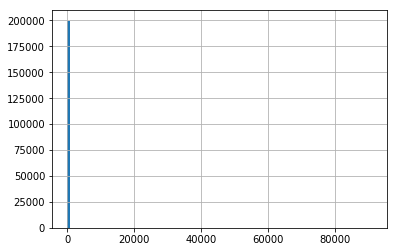

In [107]:
%matplotlib inline
import seaborn

submission['target'].hist(bins=100)

In [108]:
submission.to_csv('submission.csv.gz', compression='gzip', index=False)

In [113]:
!kaggle competitions submit -c santander-customer-transaction-prediction -f submission.csv.gz -m "Individual feature predictions mix: local 1-fold validation 0.92303 (can be overfit)"


100%|███████████████████████████████████████| 2.28M/2.28M [00:02<00:00, 800kB/s]
Successfully submitted to Santander Customer Transaction Prediction